# Time Series EDA

In [2]:
pip install yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
  Using cached frozendict-2.4.0-py3-none-any.whl
  Using cached peewee-3.17.1-py3-none-any.whl
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------- ------------------------ 41.0/112.2 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 112.2/112.2 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/72.4 kB ? eta -:--:--
   ---------------------------------------- 72.4/72.4 kB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from pandas_datareader import data as pdr
from datetime import datetime
import pandas as pd
import yfinance as yf

In [4]:
yf.pdr_override()

In [11]:
df_tsla=pdr.get_data_yahoo('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [13]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

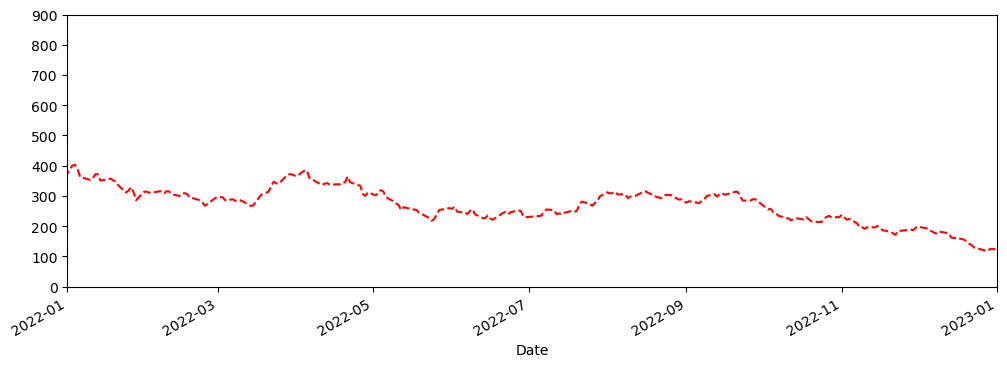

In [28]:
df_tsla['High'].plot(xlim=['2022-01-01','2023-01-01'],ylim=[0,900],figsize=(12,4),ls='--',c='red')

In [83]:
index=df_tsla.loc['2022-01-01':'2023-01-01'].index
share_open=df_tsla.loc['2022-01-01':'2023-01-01']['Open']
share_open

Date
2022-01-03    382.583344
2022-01-04    396.516663
2022-01-05    382.216675
2022-01-06    359.000000
2022-01-07    360.123322
                 ...    
2022-12-23    126.370003
2022-12-27    117.500000
2022-12-28    110.349998
2022-12-29    120.389999
2022-12-30    119.949997
Name: Open, Length: 251, dtype: float64

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

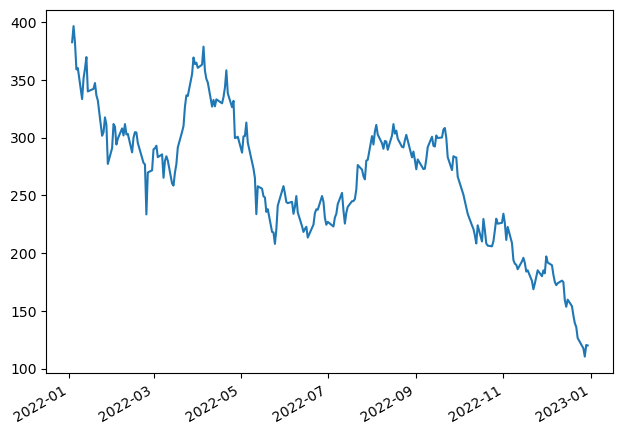

In [86]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [87]:
#Datetime Index

In [91]:
df_tsla=df_tsla.reset_index()
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3428 entries, 0 to 3427
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   level_0    3428 non-null   int64         
 1   index      3428 non-null   int64         
 2   Date       3428 non-null   datetime64[ns]
 3   Open       3428 non-null   float64       
 4   High       3428 non-null   float64       
 5   Low        3428 non-null   float64       
 6   Close      3428 non-null   float64       
 7   Adj Close  3428 non-null   float64       
 8   Volume     3428 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(3)
memory usage: 241.2 KB


In [92]:
pd.to_datetime(df_tsla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3423   2024-02-05
3424   2024-02-06
3425   2024-02-07
3426   2024-02-08
3427   2024-02-09
Name: Date, Length: 3428, dtype: datetime64[ns]

In [104]:
df_tsla=df_tsla.set_index('Date',drop=True)

In [105]:
from datetime import datetime

In [106]:
datetime.now()

datetime.datetime(2024, 2, 12, 23, 3, 3, 105136)

In [109]:
df_tsla.drop('level_0',axis=1,inplace=True)

# Time Resampling
    

In [110]:
df_tsla.head()

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [157]:
df_tsla.resample(rule='BQS').max()

,index,Open,High,Low,Close,Adj Close,Volume,Open: 30 Days rolling
Date,,,,,,,,
2010-04-01,1,1.719333,2.028000,1.553333,1.592667,1.592667,281494500,NaN
2010-07-01,65,1.666667,1.728000,1.408667,1.465333,1.465333,123282000,1.357711
2010-10-01,129,2.391333,2.428000,2.316667,2.364667,2.364667,139528500,2.119200
2011-01-03,191,1.906000,1.914000,1.870000,1.896667,1.896667,172767000,2.081578
2011-04-01,254,2.006667,2.100000,1.970000,2.009333,2.009333,93138000,1.872511
2011-07-01,318,1.992667,2.029333,1.934000,1.982000,1.982000,45967500,1.893467
2011-10-03,381,2.308667,2.333333,2.268667,2.329333,2.329333,58024500,2.130822
2012-01-02,443,2.546000,2.663333,2.474000,2.529333,2.529333,82506000,2.323133
2012-04-02,506,2.488667,2.564667,2.444667,2.534000,2.534000,83344500,2.338800


<Axes: xlabel='Date'>

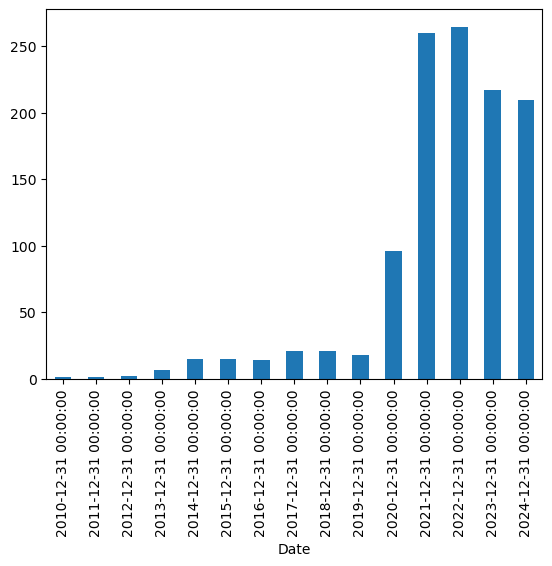

In [158]:
df_tsla['Open'].resample(rule='A').mean().plot(kind='bar')

<Axes: xlabel='Date'>

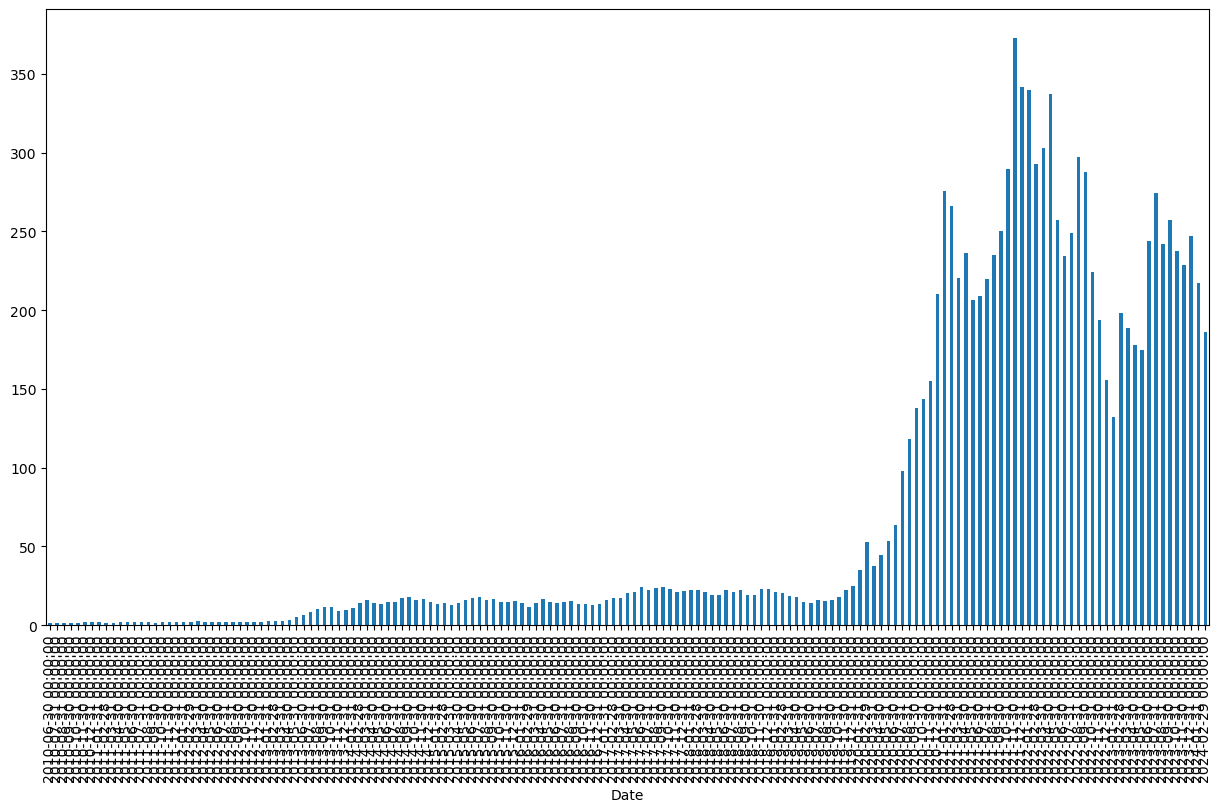

In [159]:
df_tsla['Open'].resample(rule='M').mean().plot(kind='bar',figsize=(15,8))

In [160]:
df_tsla['High'].rolling(11).mean().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13         NaN
2010-07-14    1.414242
2010-07-15    1.393030
2010-07-16    1.337758
2010-07-19    1.315515
2010-07-20    1.307939
2010-07-21    1.313394
2010-07-22    1.341394
2010-07-23    1.365879
2010-07-26    1.387697
2010-07-27    1.406545
Name: High, dtype: float64

In [161]:
df_tsla['Open: 30 Days rolling']=df_tsla['Open'].rolling(30).mean()

In [162]:
df_tsla


,index,Open,High,Low,Close,Adj Close,Volume,Open: 30 Days rolling
Date,,,,,,,,
2010-06-29,0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN
2010-06-30,1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN
2010-07-01,2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN
2010-07-02,3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN
2010-07-06,4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN
...,...,...,...,...,...,...,...,...
2024-02-05,3423,184.259995,184.679993,175.009995,181.059998,181.059998,134294400,222.155335
2024-02-06,3424,177.210007,186.490005,177.110001,185.100006,185.100006,122676000,219.665669
2024-02-07,3425,188.179993,189.789993,182.679993,187.580002,187.580002,111535200,217.379668


<Axes: xlabel='Date'>

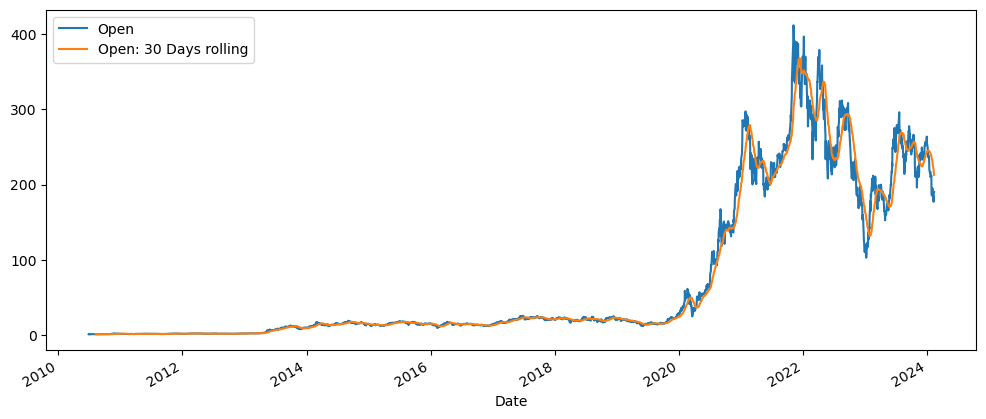

In [163]:
df_tsla[['Open','Open: 30 Days rolling']].plot(figsize=(12,5))